In [30]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from pyresample import geometry

/sharedData2/nshakoor/.conda/envs/fires/lib/python3.7/site-packages/pyresample/bilinear/__init__.py:49: UserWarning: XArray and/or zarr not found, XArrayBilinearResampler won't be available.
  warnings.warn("XArray and/or zarr not found, XArrayBilinearResampler won't be available.")


In [32]:
def shiftPixels(refimg, newimg_full, lats, lons):
    newimg = newimg_full[lats[0]:lats[1], lons[0]:lons[1]]
    x_add = 0
    y_add = 0
    nx = 0
    ny = 0
    while refimg.shape != newimg.shape:
        if refimg.shape[0] > newimg.shape[0]:
            x_add += 1
            nx += 1
        elif refimg.shape[0] < newimg.shape[0]:
            x_add -= 1
            nx += 1
        if refimg.shape[1] > newimg.shape[1]:
            y_add += 1
            ny += 1
        elif refimg.shape[1] < newimg.shape[1]:
            y_add -= 1
            ny += 1
        newimg = newimg_full[lats[0]:lats[1] + x_add, lons[0]:lons[1] + y_add]
    lats[1] += x_add
    lons[1] += y_add
    
    min_x = -2
    min_y = 0

    return newimg_full[lats[0]+min_x:lats[1]+min_x, lons[0]+min_y:lons[1]+min_y]

In [27]:
landsat_path = '../landsat_files/landsat_files/'
goes_path = '../landsat_files/'
goes_039 = np.load(goes_path + 'OR_ABI-L1b-RadC-M6C07_G17_s20212401846176_e20212401848561_c20212401849003.npy')
goes_103 = np.load(goes_path + 'OR_ABI-L1b-RadC-M6C14_G17_s20212401846176_e20212401848549_c20212401848593.npy')
goes_fire_mask = np.load(goes_path + 'OR_ABI-L2-FDCC-M6_G17_s20212401846176_e20212401848549_c20212401849146.npy')
goes_fire_mask[goes_fire_mask >= 100] = 0

Text(0.5, 1.0, 'Fire Mask')

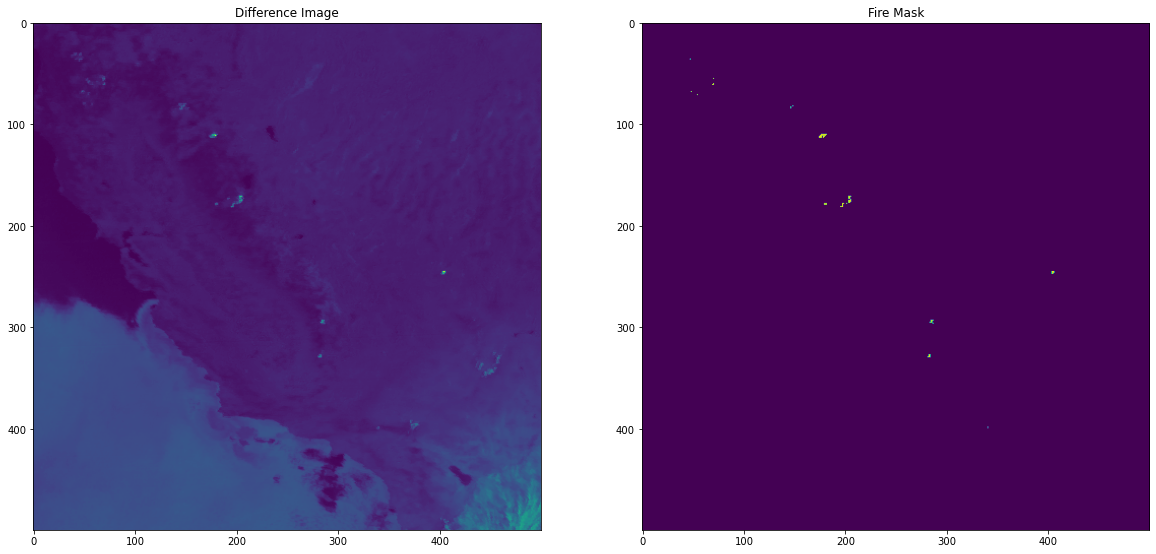

In [28]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(goes_039-goes_103)
ax[0].set_title('Difference Image')
ax[1].imshow(goes_fire_mask)
ax[1].set_title('Fire Mask')

In [31]:
pc = ccrs.PlateCarree()
pc_params = pc.proj4_params
pc_extents = [-124.25, 32.25, -114.25, 42.25]
shape = [500, 500]
target_area = geometry.AreaDefinition.from_extent('CA', pc_params, shape, pc_extents)

latlon1A = [40.49, -121.45]
latlon2A = [40.650000000000006, -121.17]
coords1A = target_area.get_array_coordinates_from_lonlat(latlon1A[1], latlon1A[0])
coords1A = (round(coords1A[0]), round(coords1A[1]))
coords2A = target_area.get_array_coordinates_from_lonlat(latlon2A[1], latlon2A[0])
coords2A = (round(coords2A[0]), round(coords2A[1]))
lonsA = [coords1A[0], coords2A[0]]
latsA = [coords2A[1], coords1A[1]]

latlon1B = [39.91, -120.97]
latlon2B = [40.13, -120.49000000000001]
coords1B = target_area.get_array_coordinates_from_lonlat(latlon1B[1], latlon1B[0])
coords1B = (round(coords1B[0]), round(coords1B[1]))
coords2B = target_area.get_array_coordinates_from_lonlat(latlon2B[1], latlon2B[0])
coords2B = (round(coords2B[0]), round(coords2B[1]))
lonsB = [coords1B[0], coords2B[0]]
latsB = [coords2B[1], coords1B[1]]

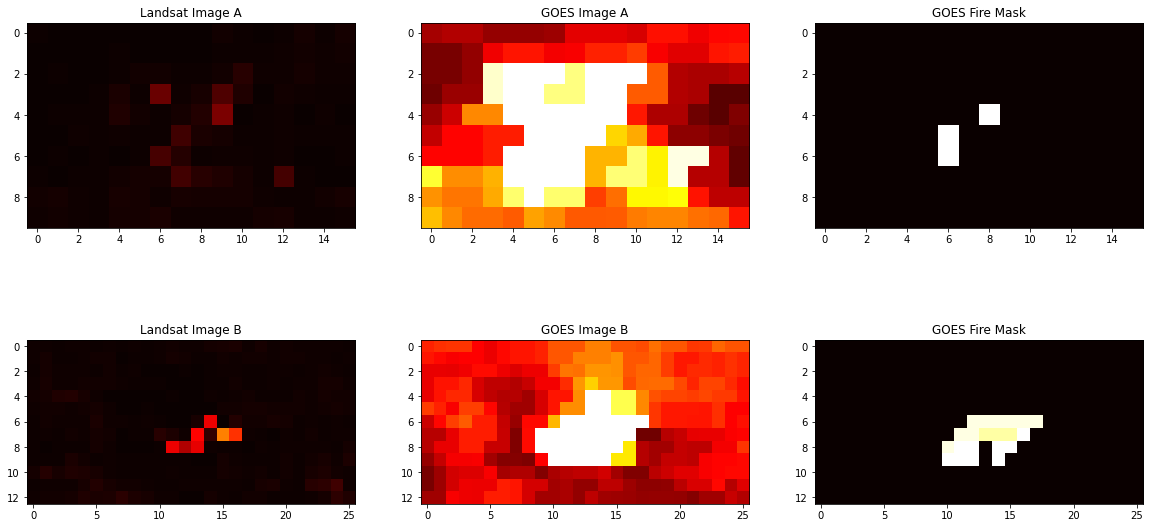

In [50]:
f, (ax1, ax2) = plt.subplots(2, 3, figsize=(20, 10))

landsat_img_039_A = np.flipud(np.load(landsat_path + 'LC08_L2SP_044032_20210828_20210901_02_T1_goesLS_BT3.9_gridAcent0.02deg.npy'))
goes_img_039_A = shiftPixels(landsat_img_039_A, goes_039, [latsA[0], latsA[1]], [lonsA[0], lonsA[1]])
landsat_img_103_A = np.flipud(np.load(landsat_path + 'LC08_L2SP_044032_20210828_20210901_02_T1_goesLS_BT10.3_gridAcent0.02deg.npy'))
goes_img_103_A = shiftPixels(landsat_img_103_A, goes_103, [latsA[0], latsA[1]], [lonsA[0], lonsA[1]])

landsat_img_039_B = np.flipud(np.load(landsat_path + 'LC08_L2SP_044032_20210828_20210901_02_T1_goesLS_BT3.9_gridBcent0.02deg.npy'))
goes_img_039_B = shiftPixels(landsat_img_039_B, goes_039, [latsB[0], latsB[1]], [lonsB[0], lonsB[1]])
landsat_img_103_B = np.flipud(np.load(landsat_path + 'LC08_L2SP_044032_20210828_20210901_02_T1_goesLS_BT10.3_gridBcent0.02deg.npy'))
goes_img_103_B = shiftPixels(landsat_img_103_B, goes_103, [latsB[0], latsB[1]], [lonsB[0], lonsB[1]])

goes_fire_mask_A = shiftPixels(landsat_img_039_A, goes_fire_mask, [latsA[0], latsA[1]], [lonsA[0], lonsA[1]])
goes_fire_mask_B = shiftPixels(landsat_img_039_B, goes_fire_mask, [latsB[0], latsB[1]], [lonsB[0], lonsB[1]])

max_temp = 10
min_temp = 0

landsat_map = ax1[0].imshow(landsat_img_039_A-landsat_img_103_A, vmin = min_temp, vmax = max_temp, cmap='hot')
ax1[0].set_title('Landsat Image A')
ax1[1].imshow(goes_img_039_A-goes_img_103_A, vmin = min_temp, vmax = max_temp, cmap='hot')
ax1[1].set_title('GOES Image A')
ax1[2].imshow(goes_fire_mask_A, cmap='hot')
ax1[2].set_title('GOES Fire Mask')

landsat_map = ax2[0].imshow(landsat_img_039_B-landsat_img_103_B, vmin = min_temp, vmax = max_temp, cmap='hot')
ax2[0].set_title('Landsat Image B')
ax2[1].imshow(goes_img_039_B-goes_img_103_B, vmin = min_temp, vmax = max_temp, cmap='hot')
ax2[1].set_title('GOES Image B')
ax2[2].imshow(goes_fire_mask_B, cmap='hot')
ax2[2].set_title('GOES Fire Mask')

plt.colorbar(landsat_map, ax = ax)